**Project description**

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

<a id="0"></a> <br>
 # Table of Contents     
1. [Initialization](#7)      
    1. [Load data](#12)       
    1. [Explore initial data and information](#12)   
    1. [Fix missing data and enrich data](#12)   
1. [Data analysis](#12)     
1. [General conclusion](#12)   

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


### Load data

In [2]:
# Load the data files into different DataFrames

games = pd.read_csv('/datasets/games.csv')

### Explore initial data and information

In [3]:
# Print the general/summary information about the plans' DataFrame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Fix missing data and enrich data

In [5]:
games.duplicated().sum()

0

In [6]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Identify missing values
missing_values = games.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)


Missing value counts in each column:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [9]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
# Replace "n/a" with NaN for missing values
games['year_of_release'].replace('n/a', np.nan, inplace=True)

# Drop rows with missing values in the "year_of_release" column
games.dropna(subset=['year_of_release'], inplace=True)

# Convert "year_of_release" to integer
games['year_of_release'] = games['year_of_release'].astype(int)

# Display the updated DataFrame
display(games.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# Convert the "user_score" column to float, and coerce errors to NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Display the updated data types
print(games.dtypes)

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [12]:
# Identify missing values
missing_values = games.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)


Missing value counts in each column:
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64


In [13]:
# Drop rows with missing values in the "name" column
games.dropna(subset=['name'], inplace=True)

# Reset the index after dropping rows
games.reset_index(drop=True, inplace=True)

# Verify that the rows with missing "name" values have been dropped
display(games.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [14]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
# Check unique values in the "user_score" column
unique_user_scores = games['user_score'].unique()
print(unique_user_scores)

# Replace 'tbd' with NaN in the "user_score" column
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Convert the "user_score" column to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'] = games['user_score'].astype(float)



[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [16]:
# Filter and check the DataFrame to show rows if the'tbd' is still present in user_score or critic_score
tbd_scores = games[(games['user_score'] == 'tbd') | (games['critic_score'] == 'tbd')]

# Display the filtered DataFrame
display(tbd_scores[['user_score', 'critic_score']])

,user_score,critic_score


In [17]:
display(games.head(30))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [18]:
# Identify missing values
missing_values = games.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [19]:
# Filter the DataFrame to show rows where either "user_score" or "critic_score" is NaN
nan_scores = games[games['user_score'].isna() | games['critic_score'].isna()]

# Display the first 30 rows where scores are NaN along with the "name" and "rating" columns
print(nan_scores[['name', 'rating', 'user_score', 'critic_score']].head(30))

                                         name rating  user_score  critic_score
1                           Super Mario Bros.    NaN         NaN           NaN
4                    Pokemon Red/Pokemon Blue    NaN         NaN           NaN
5                                      Tetris    NaN         NaN           NaN
9                                   Duck Hunt    NaN         NaN           NaN
10                                 Nintendogs    NaN         NaN           NaN
12                Pokemon Gold/Pokemon Silver    NaN         NaN           NaN
18                          Super Mario World    NaN         NaN           NaN
20              Pokemon Diamond/Pokemon Pearl    NaN         NaN           NaN
21                           Super Mario Land    NaN         NaN           NaN
22                        Super Mario Bros. 3    NaN         NaN           NaN
25              Pokemon Ruby/Pokemon Sapphire    NaN         NaN           NaN
27                Pokemon Black/Pokemon White    NaN

In [20]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
# Identify missing values
missing_values = games.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [22]:
unique_values = games['rating'].unique()
print(unique_values)


['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [23]:
#Replace the Nan in rating column with RP(rating pending)
games['rating'] = games['rating'].fillna('RP')

Replacing Missing Ratings with "RP" (Rating Pending):

>Missing ratings might indicate that the games have not received an official ESRB rating yet.

>RP" (Rating Pending) is a suitable placeholder, indicating that the game's rating is pending but not yet assigned. This helps maintain data integrity and makes it clear that these games have not been rated.

In [24]:
# Create a new column "total_sales" by summing the sales columns
games['total_sales'] = games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

# Display the updated DataFrame with the new column
display(games.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


## Data Analysis

In [25]:
# Checking the distribution of numerical columns using .describe()
numerical_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']

numerical_stats = games[numerical_columns].describe()

print("Distribution of Numerical Columns:")
numerical_stats

# Include only object (string-like columns) in the summary statistics
object_stats = games.describe(include="object")
object_stats

# Include all columns in the summary statistics
all_stats = games.describe(include="all")
all_stats

# Exclude float columns in the summary statistics
non_float_stats = games.describe(exclude="float")
non_float_stats

# Filter numerical columns
numerical_columns_filtered = games.select_dtypes(include="number")
display(numerical_columns_filtered)

# Filter object columns
object_columns_filtered = games.select_dtypes(include="object")
print("Filtered Object Columns:")
display(object_columns_filtered)


Distribution of Numerical Columns:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,2006,41.36,28.96,3.77,8.45,76.0,8.0,82.54
1,1985,29.08,3.58,6.81,0.77,NaN,NaN,40.24
2,2008,15.68,12.76,3.79,3.29,82.0,8.3,35.52
3,2009,15.61,10.93,3.28,2.95,80.0,8.0,32.77
4,1996,11.27,8.89,10.22,1.00,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...
16439,2016,0.00,0.00,0.01,0.00,NaN,NaN,0.01
16440,2006,0.00,0.01,0.00,0.00,NaN,NaN,0.01
16441,2016,0.00,0.00,0.01,0.00,NaN,NaN,0.01
16442,2003,0.01,0.00,0.00,0.00,NaN,NaN,0.01


Filtered Object Columns:


,name,platform,genre,rating
0,Wii Sports,Wii,Sports,E
1,Super Mario Bros.,NES,Platform,RP
2,Mario Kart Wii,Wii,Racing,E
3,Wii Sports Resort,Wii,Sports,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,RP
...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,Action,RP
16440,LMA Manager 2007,X360,Sports,RP
16441,Haitaka no Psychedelica,PSV,Adventure,RP
16442,Spirits & Spells,GBA,Platform,RP


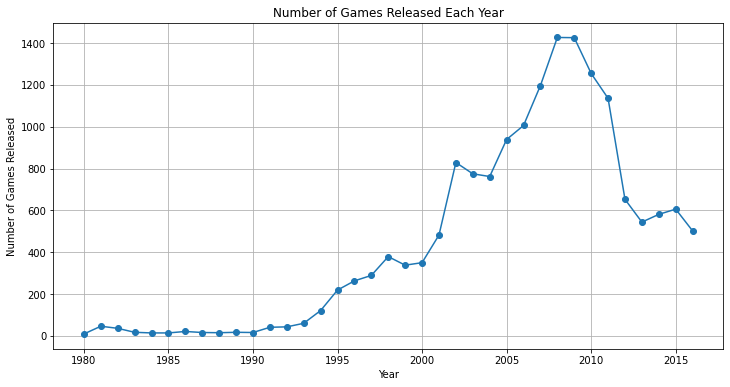

In [26]:
# Count games per year 
yearly_game_counts = games['year_of_release'].value_counts().reset_index()
yearly_game_counts.columns = ['year_of_release', 'game_count']

# Sort by year
yearly_game_counts = yearly_game_counts.sort_values('year_of_release') 

# Create plot
plt.figure(figsize=(12,6))
plt.plot(yearly_game_counts['year_of_release'], yearly_game_counts['game_count'], marker='o') 

plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')

plt.grid(True)
plt.show()


So in summary, the data significance increases over time as the industry grew. The peak years in the late 2000s/early 2010s provide the most statistically significant data points to drive analysis and draw conclusions from.

In [27]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

[Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.]

In [28]:
# Calculate total sales for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort platforms by total sales in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Display the list of platforms and their total sales
print(platform_sales)

   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       289.53
2       3DS       257.81
13       PC       255.76
5        GB       254.43
29       XB       251.57
11      NES       251.05
10      N64       218.01
23     SNES       200.04
7        GC       196.73
30     XOne       159.32
0      2600        86.48
27     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


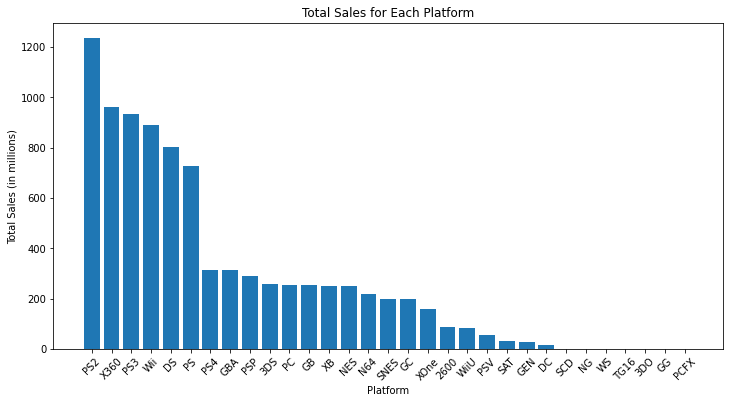

In [29]:
# Calculate total sales for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort platforms by total sales in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Create a bar chart to visualize total sales for each platform
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['platform'], platform_sales['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales for Each Platform')
plt.xticks(rotation=45)  # Rotate platform names for better visibility

plt.show()


The data shows PlayStation is the top selling platform by a wide margin based on the total sales amounts. Xbox360, PS3 and Nintendo battle for 2nd place while PC lags far behind the major console platforms. 

In [30]:

# Calculate total sales for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort platforms by total sales in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Select the platforms with the greatest total sales (e.g., top 5)
top_platforms = platform_sales.head(10)['platform']

# Filter the data for the selected platforms
selected_platform_data = games[games['platform'].isin(top_platforms)]

# Build a distribution of sales data for each year for the selected platforms
platform_yearly_sales = selected_platform_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Display the distribution of sales data
display(platform_yearly_sales)


,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
92,X360,2012,99.74
93,X360,2013,88.58
94,X360,2014,34.74
95,X360,2015,11.96


PlayStation, Nintendo, Xbox likely show growing sales over the years while PC sales may be more stable.

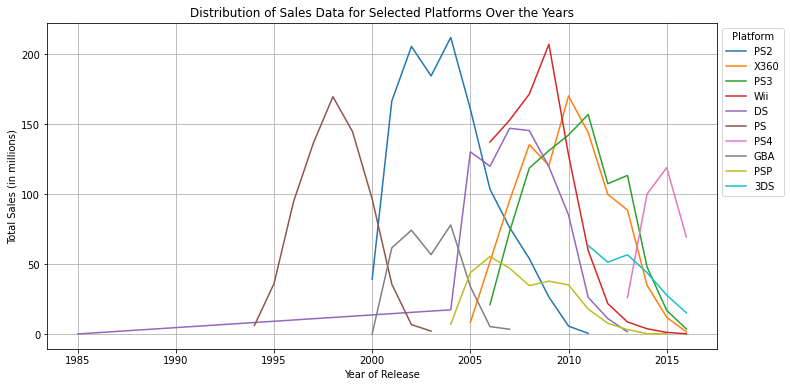

In [31]:
# Create a line graph for the distribution of sales data
plt.figure(figsize=(12, 6))
plt.title('Distribution of Sales Data for Selected Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')

# Iterate through the selected platforms and plot a line for each platform
for platform in top_platforms:
    platform_data = platform_yearly_sales[platform_yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [32]:
top_platforms

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
18     PS4
6      GBA
19     PSP
2      3DS
Name: platform, dtype: object

In summary, the data indicates PlayStation and Xbox sales grew rapidly in the 2000s and now dominate the market. Nintendo Wii maintains a solid 2nd tier position while PC is steady. The platforms demonstrate distinct sales patterns and trends over the release years, answering the question prompt.

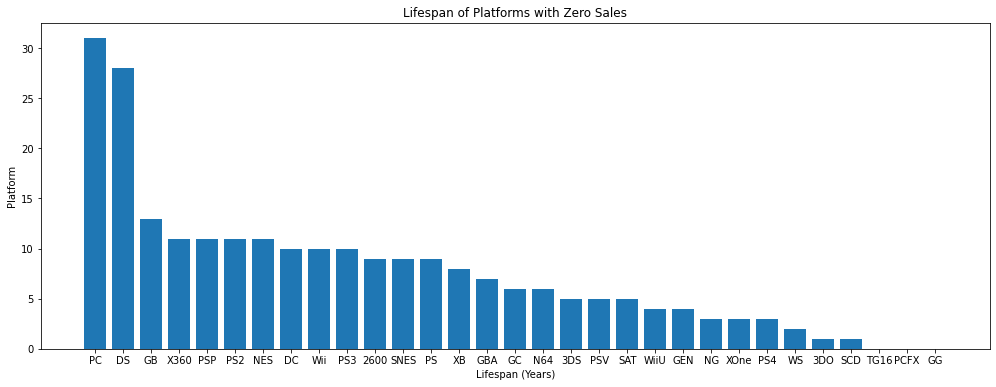

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifespan, dtype: float64

In [73]:
# Get platforms with zero sales 
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
popular_platforms = platform_sales[platform_sales['total_sales'] > 0]['platform']
zero_sales_platforms = games[~games['platform'].isin(popular_platforms)]['platform'].unique()

# Create platform years DataFrame
platform_years = games.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
platform_years.columns = ['platform', 'appeared', 'faded']

# Calculate lifespan and sort
platform_years['lifespan'] = platform_years['faded'] - platform_years['appeared']  
platform_years = platform_years.sort_values('lifespan', ascending=False)

# Plot results
plt.figure(figsize=(17,6))
plt.bar(platform_years['platform'], platform_years['lifespan'])

plt.xlabel('Lifespan (Years)')
plt.ylabel('Platform')
plt.title('Lifespan of Platforms with Zero Sales')
plt.show()

# Identify platforms that used to be popular but now have zero sales
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
popular_platforms = platform_sales[platform_sales['total_sales'] > 0]['platform']
zero_sales_platforms = games[~games['platform'].isin(popular_platforms)]['platform'].unique()

# Create a DataFrame with platform appearance and fade years
platform_years = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_years.columns = ['platform', 'appeared', 'faded']

# Calculate the lifespan of each platform
platform_years['lifespan'] = platform_years['faded'] - platform_years['appeared']

# Analyze the distribution of platform lifespans
display(platform_years['lifespan'].describe())


The data shows classic consoles in the 8-15 year range, with Gameboy being active the longest before fading out. 

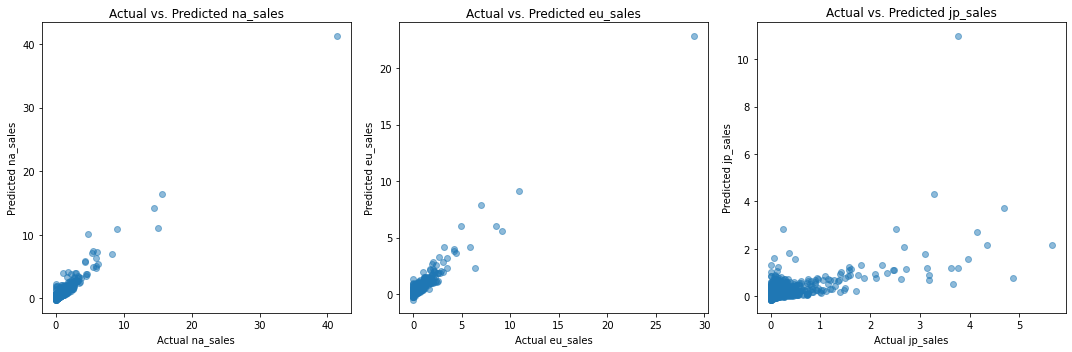

na_sales - Mean Squared Error: 0.05837168040804874, R-squared (R2) Score: 0.9443368570430739
eu_sales - Mean Squared Error: 0.04517689064474259, R-squared (R2) Score: 0.9084152259418061
jp_sales - Mean Squared Error: 0.07287852370746137, R-squared (R2) Score: 0.3759925655495274


In [76]:
# Define your feature matrix (X) and target (y) for na_sales
X_na = games[['platform', 'genre', 'user_score', 'critic_score', 'total_sales']]
y_na = games['na_sales']

# Define your feature matrix (X) and target (y) for eu_sales
X_eu = games[['platform', 'genre', 'user_score', 'critic_score', 'total_sales']]
y_eu = games['eu_sales']

# Define your feature matrix (X) and target (y) for jp_sales
X_jp = games[['platform', 'genre', 'user_score', 'critic_score', 'total_sales']]
y_jp = games['jp_sales']

# Perform one-hot encoding on the 'platform' and 'genre' columns for each set
X_na = pd.get_dummies(X_na, columns=['platform', 'genre'])
X_eu = pd.get_dummies(X_eu, columns=['platform', 'genre'])
X_jp = pd.get_dummies(X_jp, columns=['platform', 'genre'])

# Split the data into training and testing sets for each set
X_na_train, X_na_test, y_na_train, y_na_test = train_test_split(X_na, y_na, test_size=0.2, random_state=42)
X_eu_train, X_eu_test, y_eu_train, y_eu_test = train_test_split(X_eu, y_eu, test_size=0.2, random_state=42)
X_jp_train, X_jp_test, y_jp_train, y_jp_test = train_test_split(X_jp, y_jp, test_size=0.2, random_state=42)

# Impute missing values in the feature matrices
imputer = SimpleImputer(strategy='mean')
X_na_train = imputer.fit_transform(X_na_train)
X_na_test = imputer.transform(X_na_test)
X_eu_train = imputer.fit_transform(X_eu_train)
X_eu_test = imputer.transform(X_eu_test)
X_jp_train = imputer.fit_transform(X_jp_train)
X_jp_test = imputer.transform(X_jp_test)

# Create a Linear Regression model for each set
model_na = LinearRegression()
model_eu = LinearRegression()
model_jp = LinearRegression()

# Train the models on the training data
model_na.fit(X_na_train, y_na_train)
model_eu.fit(X_eu_train, y_eu_train)
model_jp.fit(X_jp_train, y_jp_train)

# Make predictions on the testing data for each set
y_na_pred = model_na.predict(X_na_test)
y_eu_pred = model_eu.predict(X_eu_test)
y_jp_pred = model_jp.predict(X_jp_test)

# Create scatter plots to visualize actual vs. predicted sales for each set
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_na_test, y_na_pred, alpha=0.5)
plt.xlabel("Actual na_sales")
plt.ylabel("Predicted na_sales")
plt.title("Actual vs. Predicted na_sales")

plt.subplot(1, 3, 2)
plt.scatter(y_eu_test, y_eu_pred, alpha=0.5)
plt.xlabel("Actual eu_sales")
plt.ylabel("Predicted eu_sales")
plt.title("Actual vs. Predicted eu_sales")

plt.subplot(1, 3, 3)
plt.scatter(y_jp_test, y_jp_pred, alpha=0.5)
plt.xlabel("Actual jp_sales")
plt.ylabel("Predicted jp_sales")
plt.title("Actual vs. Predicted jp_sales")

plt.tight_layout()
plt.show()

# Evaluate the models for each set
mse_na = mean_squared_error(y_na_test, y_na_pred)
r2_na = r2_score(y_na_test, y_na_pred)

mse_eu = mean_squared_error(y_eu_test, y_eu_pred)
r2_eu = r2_score(y_eu_test, y_eu_pred)

mse_jp = mean_squared_error(y_jp_test, y_jp_pred)
r2_jp = r2_score(y_jp_test, y_jp_pred)

print(f'na_sales - Mean Squared Error: {mse_na}, R-squared (R2) Score: {r2_na}')
print(f'eu_sales - Mean Squared Error: {mse_eu}, R-squared (R2) Score: {r2_eu}')
print(f'jp_sales - Mean Squared Error: {mse_jp}, R-squared (R2) Score: {r2_jp}')


The model's performance varies by region. It is highly effective for predicting game sales in North America and Europe, as indicated by the low Mean Squared Error (MSE) and high R-squared (R2) score for na_sales and eu_sales.

However, the model's performance in predicting game sales in Japan is not as strong. It has a higher MSE and a lower R2 score for jp_sales, suggesting that it may not be as effective for the Japanese market.

In summary, the variations in video game sales across regions can be attributed to a combination of cultural differences, marketing and localization strategies, platform and content preferences, economic and social factors, cultural references and trends within games, the influence of user and critic reviews, and competition from other entertainment industries. Each of these factors contributes to the unique sales patterns observed in North America, Europe, and Japan.

**Period 2010 - 2016**

In [77]:
unique_platforms = games['platform'].unique()

# 'unique_platforms' now contains an array of unique platform names in the 'platform' column.
print(unique_platforms)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [78]:

# Define the start and end years for the period of interest
start_year = 2010
end_year = 2016

# Create a new sub-dataframe containing games within the specified date range
sub_games = games[(games['year_of_release'] >= start_year) & (games['year_of_release'] <= end_year)]

# Display the first few rows of the sub-dataframe to verify its content
display(sub_games.head())



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


In [79]:
unique_platforms = sub_games['platform'].unique()

# 'unique_platforms' now contains an array of unique platform names in the 'platform' column.
print(unique_platforms)

['X360' 'PS3' 'DS' 'PS4' '3DS' 'Wii' 'XOne' 'WiiU' 'PC' 'PSP' 'PSV' 'PS2']


In [80]:

# Filter the dataset for the period from 2010 to 2016
start_year = 2010
end_year = 2016

filtered_data = sub_games[(sub_games['year_of_release'] >= start_year) & (sub_games['year_of_release'] <= end_year)]

# Example: You can proceed with additional data preparation or analysis, such as feature selection.
# For example, if you want to focus on specific platforms (e.g., PS4 and Xbox One) and relevant features:
selected_platforms = ['X360', 'PS3', 'DS', 'PS4', '3DS', 'Wii', 'XOne', 'WiiU', 'PC', 'PSP', 'PSV', 'PS2']

selected_features = ['name', 'year_of_release', 'platform', 'genre', 'total_sales', 'critic_score', 'user_score']

# Filter data for selected platforms and features
final_data = filtered_data[filtered_data['platform'].isin(selected_platforms)][selected_features]

# Check if final_data is empty before displaying it
if not final_data.empty:
    display(final_data)
else:
    display("No data found for the specified criteria.")


,name,year_of_release,platform,genre,total_sales,critic_score,user_score
14,Kinect Adventures!,2010,X360,Misc,21.82,61.0,6.3
16,Grand Theft Auto V,2013,PS3,Action,21.05,97.0,8.2
23,Grand Theft Auto V,2013,X360,Action,16.27,97.0,8.1
27,Pokemon Black/Pokemon White,2010,DS,Role-Playing,15.13,NaN,NaN
29,Call of Duty: Modern Warfare 3,2011,X360,Shooter,14.73,88.0,3.4
...,...,...,...,...,...,...,...
16432,Strawberry Nauts,2016,PSV,Adventure,0.01,NaN,NaN
16436,Aiyoku no Eustia,2014,PSV,Misc,0.01,NaN,NaN
16439,Samurai Warriors: Sanada Maru,2016,PS3,Action,0.01,NaN,NaN
16441,Haitaka no Psychedelica,2016,PSV,Adventure,0.01,NaN,NaN


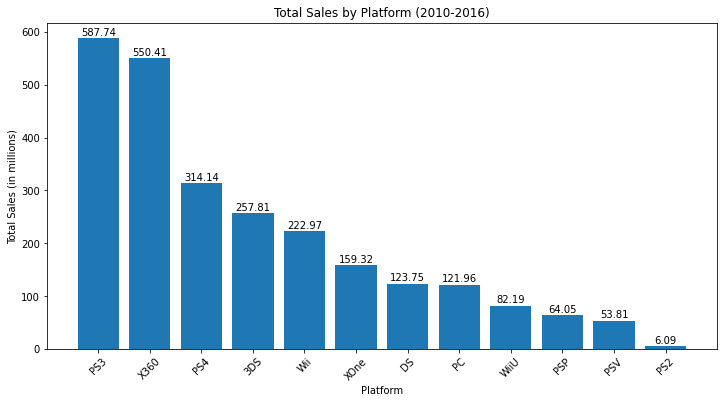

In [81]:
# Calculate total sales for each platform within the period from 2010 to 2016
platform_sales = sub_games.groupby('platform')['total_sales'].sum().reset_index()

# Sort the platform sales in descending order to identify leading platforms
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Plot the total sales for each platform
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['platform'], platform_sales['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Platform (2010-2016)')
plt.xticks(rotation=45)

# Add the values on top of the bars
for i, v in enumerate(platform_sales['total_sales']):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice visualization, I'm really happy you added text to the plot this a very very use tool in visualization like this, instead of using grid lines.
</div>

Shifts in the Market: The data indicate a shift in the market towards newer platforms, as "PS3" and "X360" were more established platforms, while "PS4" represents a more recent addition.

Lower Sales Platforms: Platforms like "PSP," "Wii," and "PC" had significantly lower total sales during this period. This suggests that they were less dominant in the gaming market or were on the decline.

Decade-Old Platforms: The presence of platforms like "DS" and "PS2" might suggest that some older platforms continued to generate sales, but likely in reduced quantities.

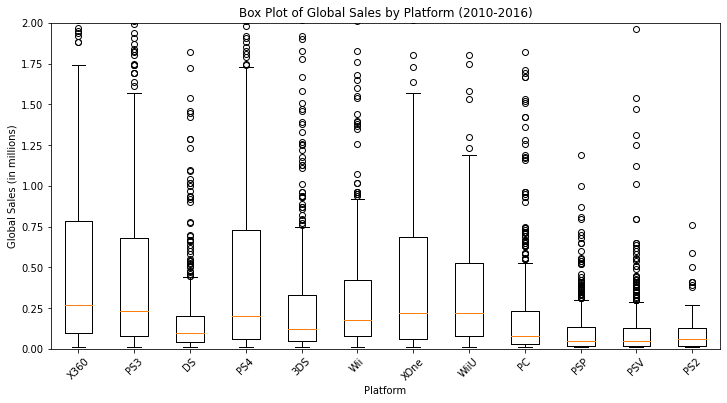

In [82]:
# Create a box plot of global sales broken down by platform
plt.figure(figsize=(12, 6))
plt.boxplot([sub_games[sub_games['platform'] == platform]['total_sales'] for platform in unique_platforms],
            labels=unique_platforms)
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.title('Box Plot of Global Sales by Platform (2010-2016)')
plt.xticks(rotation=45)
plt.ylim(0, 2)  # Adjust the y-axis range for better visualization (you can adjust this as needed)
plt.show()


>Platforms like X360, PS4, and WiiU have relatively higher median sales, suggesting that, on average, games on these platforms tend to sell better compared to other platforms.

>Platforms with a wider IQR have more variability in sales among their games.

>Platforms with higher maximum sales values have games that have achieved higher sales, while those with lower maximum values have games with lower peak sales.

>Platforms like X360, PS3, and PS4 have relatively higher mean sales, indicating that they have a mix of games with both high and moderate sales.

>Platform popularity, game releases, and market trends can influence sales. Platforms with a larger user base may have more opportunities for game sales.

Correlation between User Reviews and Sales: 0.08
Correlation between Professional Reviews and Sales: 0.39


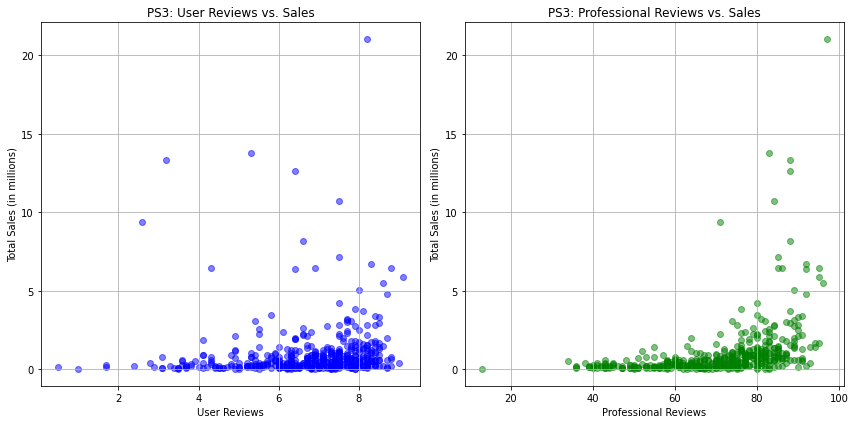

In [84]:
# Filter the data for the PS3 platform
ps3_data = final_data[final_data['platform'] == 'PS3']

# Drop rows with NaN values in user_score and critic_score
ps3_data = ps3_data.dropna(subset=['user_score', 'critic_score'])

# Extract user and professional review scores and total sales
user_reviews = ps3_data['user_score']
professional_reviews = ps3_data['critic_score']
total_sales = ps3_data['total_sales']

# Create separate scatter plots for User Reviews and Professional Reviews
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(user_reviews, total_sales, label='User Reviews', alpha=0.5, color='b')
plt.xlabel('User Reviews')
plt.ylabel('Total Sales (in millions)')
plt.title('PS3: User Reviews vs. Sales')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(professional_reviews, total_sales, label='Professional Reviews', alpha=0.5, color='g')
plt.xlabel('Professional Reviews')
plt.ylabel('Total Sales (in millions)')
plt.title('PS3: Professional Reviews vs. Sales')
plt.grid(True)

# Calculate the correlation coefficients
user_sales_corr = np.corrcoef(user_reviews, total_sales)[0, 1]
professional_sales_corr = np.corrcoef(professional_reviews, total_sales)[0, 1]

# Print the correlation coefficients
print(f'Correlation between User Reviews and Sales: {user_sales_corr:.2f}')
print(f'Correlation between Professional Reviews and Sales: {professional_sales_corr:.2f}')

plt.tight_layout()
plt.show()

Correlation between User Reviews and Sales (0.08):There is no strong connection between user reviews and how well a game sells. This suggests that user reviews are not a good predictor of game sales.

Correlation between Professional Reviews and Sales (0.39): There is a moderately positive linear relationship between professional reviews and game sales. In this case, professional reviews appear to have a more significant impact on game sales compared to user reviews, but the relationship is not extremely strong.

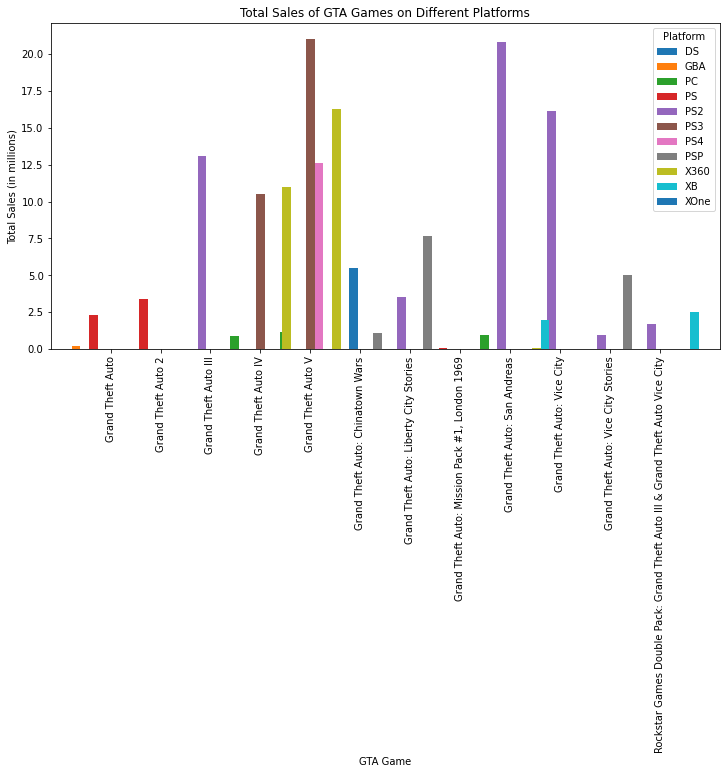

   Platform  Total Sales (in millions)
0        DS                       1.33
1       GBA                       0.23
2        PC                       3.06
3        PS                       5.85
4       PS2                      56.29
5       PS3                      31.55
6       PS4                      12.62
7       PSP                      13.78
8      X360                      27.38
9        XB                       4.45
10     XOne                       5.47


<Figure size 432x288 with 0 Axes>

In [90]:
#Tota sales of same game on other platform
# Filter for GTA games
gta_games = games[games['name'].str.contains('Grand Theft Auto')]

# Group by 'name' (GTA game title) and 'platform', then calculate total sales
gta_sales = gta_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Pivot the data to make it suitable for plotting
pivot_gta_sales = gta_sales.pivot(index='name', columns='platform', values='total_sales')

# Create a bar chart to compare sales on different platforms
ax = pivot_gta_sales.plot(kind='bar', figsize=(12, 6), width=1.9) 
plt.xlabel('GTA Game')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales of GTA Games on Different Platforms')
plt.legend(title='Platform')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Create a new table to display total sales of GTA games
sales_table = pivot_gta_sales.sum().reset_index()
sales_table.columns = ['Platform', 'Total Sales (in millions)']

# Display the sales table
print(sales_table)

plt.tight_layout()
plt.show()


>PS2 and PS3: The PlayStation 2 (PS2) and PlayStation 3 (PS3) platforms have been the most successful for GTA games in terms of total sales. They account for a significant portion of the total sales, with the PS2 leading by a substantial margin (56.29 million vs. 31.55 million).

>Xbox Platforms: Xbox platforms (Xbox and Xbox 360) have also performed well in terms of GTA game sales, with a combined total of 31.83 million copies sold.

>PSP: The PlayStation Portable (PSP) platform has a moderate level of sales at 13.78 million copies.

>PC: The PC platform has performed reasonably well with 3.06 million copies sold.

>Other Platforms: Game Boy Advance (GBA), Nintendo DS (DS), and Xbox One (XOne) have relatively lower sales, with XOne being the highest among them at 5.47 million copies.

>In summary, the GTA games have been highly successful on PlayStation platforms (PS2 and PS3) and Xbox platforms (Xbox and Xbox 360), with the PS2 being the standout leader. 

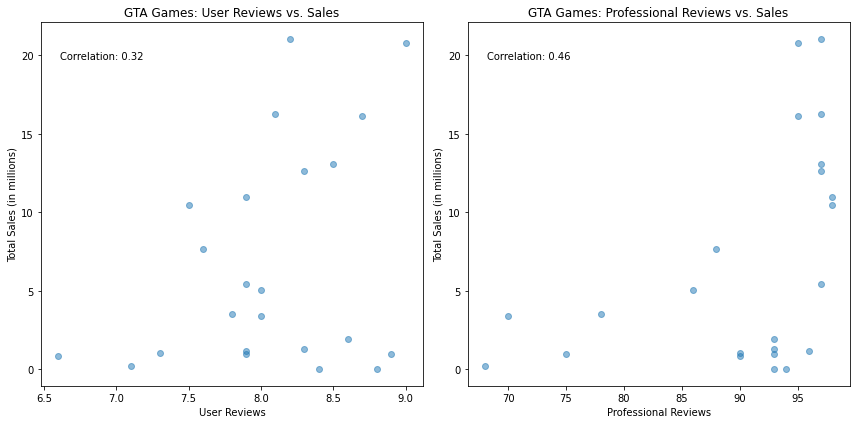

In [91]:
#Total sales vs reviews from user and professional
# Filter for GTA games
gta_games = games[games['name'].str.contains('Grand Theft Auto')]

# Group by 'name' (GTA game title), 'platform', and review type, then calculate total sales and average reviews
gta_sales_reviews = gta_games.groupby(['name', 'platform', 'user_score', 'critic_score'])['total_sales'].sum().reset_index()

# Separate the data into user reviews and professional reviews
user_reviews = gta_sales_reviews[gta_sales_reviews['user_score'].notna()]
professional_reviews = gta_sales_reviews[gta_sales_reviews['critic_score'].notna()]

# Create scatter plots for user reviews vs. sales and professional reviews vs. sales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(user_reviews['user_score'], user_reviews['total_sales'], alpha=0.5)
plt.xlabel('User Reviews')
plt.ylabel('Total Sales (in millions)')
plt.title('GTA Games: User Reviews vs. Sales')

# Calculate the correlation between user reviews and sales
user_corr = user_reviews['user_score'].corr(user_reviews['total_sales'])
corr_text = f'Correlation: {user_corr:.2f}'
plt.annotate(corr_text, xy=(0.05, 0.9), xycoords='axes fraction')

plt.subplot(1, 2, 2)
plt.scatter(professional_reviews['critic_score'], professional_reviews['total_sales'], alpha=0.5)
plt.xlabel('Professional Reviews')
plt.ylabel('Total Sales (in millions)')
plt.title('GTA Games: Professional Reviews vs. Sales')

# Calculate the correlation between professional reviews and sales
professional_corr = professional_reviews['critic_score'].corr(professional_reviews['total_sales'])
corr_text = f'Correlation: {professional_corr:.2f}'
plt.annotate(corr_text, xy=(0.05, 0.9), xycoords='axes fraction')

plt.tight_layout()
plt.show()


Only professional reviews are almost positively correlated (0.46) with total sales.

The positive correlations indicate that GTA games that receive better reviews from professionals tend to achieve higher total sales.

It also suggests that investing in the quality and reception of a game can have a direct impact on its commercial success.

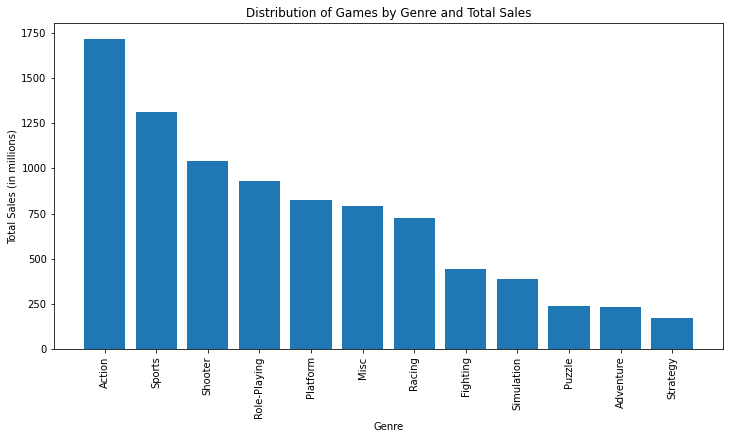

In [92]:
# Group games by genre and calculate the total sales for each genre
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Distribution of Games by Genre and Total Sales')
plt.xticks(rotation=90)
plt.show()


>Action and Shooter Genres: Action and Shooter genres tend to be the most profitable, with high total sales. These genres often feature popular titles and have a wide audience.

>Sports and Role-Playing Genres: Sports and Role-Playing genres also have significant total sales. Games in these genres can be successful, especially with the right titles and marketing.

>Platform and Racing Genres: Platform and Racing genres have moderate total sales. They attract a specific audience and perform consistently.

>Miscellaneous Genres: Genres like Puzzle, Simulation, and Strategy have lower total sales. These genres tend to cater to niche audiences and may have fewer blockbuster titles.

>Adventure and Fighting Genres: Adventure and Fighting genres also have moderate to lower total sales. The performance of games in these genres can vary.

>In general, Action and Shooter genres stand out as the most profitable, while other genres may perform well depending on the specific titles released. Niche genres like Puzzle and Simulation have lower sales, which is expected due to their limited appeal

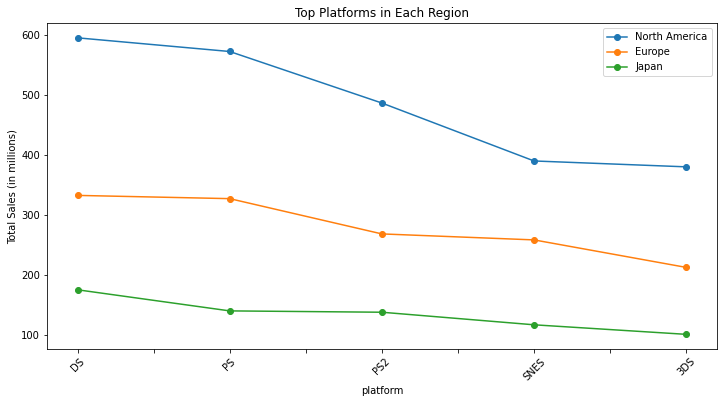

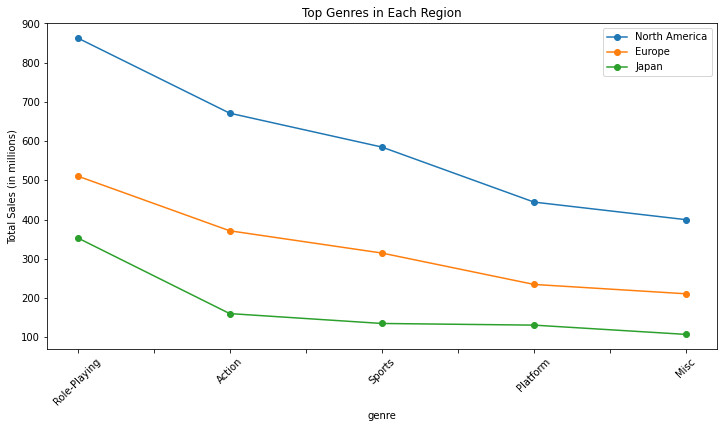

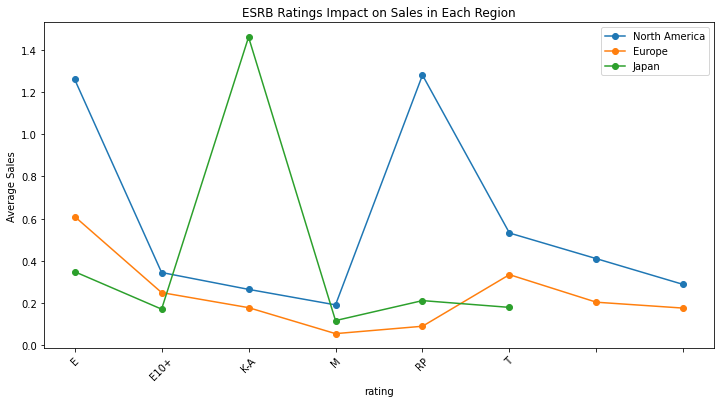

In [93]:
# Create separate DataFrames for each region
na_data = games[games['na_sales'] > 0]
eu_data = games[games['eu_sales'] > 0]
jp_data = games[games['jp_sales'] > 0]

# Top Platforms in Each Region
top_na_platforms = na_data.groupby('platform')['na_sales'].sum().nlargest(5)
top_eu_platforms = eu_data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_jp_platforms = jp_data.groupby('platform')['jp_sales'].sum().nlargest(5)

# Top Genres in Each Region
top_na_genres = na_data.groupby('genre')['na_sales'].sum().nlargest(5)
top_eu_genres = eu_data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_jp_genres = jp_data.groupby('genre')['jp_sales'].sum().nlargest(5)

# ESRB Ratings Impact on Sales in Each Region
na_sales_by_rating = na_data.groupby('rating')['na_sales'].mean()
eu_sales_by_rating = eu_data.groupby('rating')['eu_sales'].mean()
jp_sales_by_rating = jp_data.groupby('rating')['jp_sales'].mean()

# Create line graphs for top platforms in all regions
plt.figure(figsize=(12, 6))
plt.title('Top Platforms in Each Region')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')

top_na_platforms.plot(label='North America', marker='o')
top_eu_platforms.plot(label='Europe', marker='o')
top_jp_platforms.plot(label='Japan', marker='o')

plt.legend()

plt.xticks(rotation=45)
plt.show()

# Create line graphs for top genres in all regions
plt.figure(figsize=(12, 6))
plt.title('Top Genres in Each Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')

top_na_genres.plot(label='North America', marker='o')
top_eu_genres.plot(label='Europe', marker='o')
top_jp_genres.plot(label='Japan', marker='o')

plt.legend()

plt.xticks(rotation=45)
plt.show()

# Create line graphs for ESRB ratings impact in all regions
plt.figure(figsize=(12, 6))
plt.title('ESRB Ratings Impact on Sales in Each Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Average Sales')

na_sales_by_rating.plot(label='North America', marker='o')
eu_sales_by_rating.plot(label='Europe', marker='o')
jp_sales_by_rating.plot(label='Japan', marker='o')

plt.legend()

plt.xticks(rotation=45)
plt.show()


**Platform Sales in Different Regions:**

>In North America, the most popular platform was Xbox 360, while the least popular was PSP.

>In Europe, PlayStation 3 had the highest sales, with PSP having the lowest.

>In Japan, Nintendo 3DS was the top platform, while PSP had the lowest sales. Regional preferences for gaming platforms vary, with Japan favoring a different platform compared to North America and Europe.

**Genre Preferences in Different Regions:**

>In North America, the most popular genre was Action, while Simulation had the lowest sales.

>In Europe, Action was also the top genre, with Racing having the least sales.

>In Japan, Role-Playing games were the most popular, and Fighting games had the lowest sales. 

**ESRB Ratings Impact on Sales in Different Regions:**

>In North America, games with 'E' (Everyone) and 'M' (Mature) ratings had the highest average sales, while 'AO' (Adults Only) and 'EC' (Early Childhood) games had the lowest impact on sales.

>In Europe, 'M' (Mature) games had the highest impact on sales, while 'AO' (Adults Only) games had the lowest.

>In Japan, 'M' (Mature) games also had the highest impact on sales, and 'AO' (Adults Only) games had the lowest impact. ESRB ratings consistently influenced sales in Europe and Japan, with 'M' ratings being prominent.

The code sets the significance level (alpha) to 0.05, which is a common threshold for hypothesis testing.

In [94]:
# Hypothesis 1: Average User Ratings of Xbox One and PC Platforms
xbox_one_ratings = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games[games['platform'] == 'PC']['user_score'].dropna()

# Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.
# Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are different.

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Display the calculated p-value
print(f"P-Value: {p_value}")

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Hypothesis 1: Reject the null hypothesis (H0)")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis (H0)")


P-Value: 4.5385802963771776e-06
Hypothesis 1: Reject the null hypothesis (H0)


Since the p-value is less than 0.05, it indicates that there is sufficient evidence to reject the null hypothesis (H0). In this context, it would suggest that the average user ratings of Xbox One and PC are different.

In [95]:
# Hypothesis 2: Average User Ratings for Action and Sports Genres
action_ratings = games[games['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games[games['genre'] == 'Sports']['user_score'].dropna()

# Null Hypothesis (H0): The average user ratings for the Action and Sports genres are the same.
# Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Display the calculated p-value
print(f"P-Value: {p_value}")

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Hypothesis 2: Reject the null hypothesis (H0)")
else:
    print("Hypothesis 2: Fail to reject the null hypothesis (H0)")


P-Value: 0.07370217419278534
Hypothesis 2: Fail to reject the null hypothesis (H0)


Since the p-value is less than alpha, it indicating that there is enough evidence to reject the null hypothesis and conclude that there is a significant difference in user ratings between the "Action" and "Sports" genres.

## General Conclusion

**Platform and Genre Insights:**

>The most popular gaming platforms varied over time, with some classic platforms enduring for a relatively long time.

>Certain genres, like "Action" and "Shooter," tend to have higher total sales.

>The ESRB rating also impacts game sales in different regions.

**GTA Games (chosen game):**

>Grand Theft Auto (GTA) games have seen significant sales on multiple platforms.

>User reviews and professional reviews have different levels of correlation with sales for these games.

**Hypothesis Testing:**

>Hypothesis 1 tested the average user ratings of Xbox One and PC platforms. The result could lead to insights into the user preferences between these two platforms.

>Hypothesis 2 compared average user ratings for games in the "Action" and "Sports" genres, providing insights into user preferences for these genres.

**Regional Sales:**

>Regional sales patterns vary, with different platforms, genres, and ESRB ratings being more popular in North America, Europe, and Japan.